In [2]:
import torch

import transformers
from transformers import AutoModel, AutoModelForMaskedLM, AutoTokenizer

import matplotlib.pyplot as plt

from timeit import timeit

In [3]:
BERT = 'bert-base-uncased'
ROBERTA = 'roberta-base'
SPANBERT = 'SpanBERT/spanbert-base-cased'
BIGBIRD = 'google/bigbird-roberta-base'
DISTILBERT = 'distilbert-base-uncased'

# Recitation + Tutorial 12

In this recitation/tutorial we will compare different models in regard to their inference time and their language modeling capabilities.

## BERT vs. DistilBERT

In [4]:
for model_name in [BERT, DISTILBERT]:
    input_ids = torch.ones((1, 100), dtype=torch.long)
    model = AutoModel.from_pretrained(model_name)
    print(f"{model_name} inference time: {timeit(lambda: model(input_ids), number=10)}")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


bert-base-uncased inference time: 3.9588373000000274


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


distilbert-base-uncased inference time: 1.9593150000000037


## BERT vs. BigBird

In [5]:
x_values = [10 * i for i in range(1, 52)]
results = {}
for model_name in [BERT, BIGBIRD]:
    model = AutoModel.from_pretrained(model_name)
    model_results = []
    for input_length in x_values:
        input_ids = torch.ones((1, input_length), dtype=torch.long)
        model_results.append(timeit(lambda: model(input_ids), number=3))
    results[model_name] = model_results

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at google/bigbird-roberta-base were not used when initializing BigBirdModel: ['cls.predictions.transform.dense.weight'

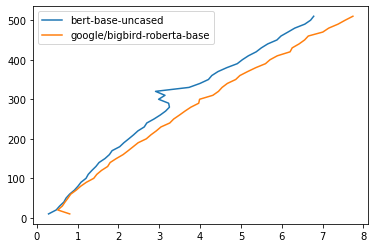

In [6]:
plt.plot(results[BERT], x_values, label=BERT)
plt.plot(results[BIGBIRD], x_values, label=BIGBIRD)
plt.legend()

## Comparing Masked Language Modeling Capabilities

    1. Find three quotes you like https://www.goodreads.com/quotes and store them in a list named 'texts'.
    2. Mask out some words and replace them with [MASK]. Make sure you replace them with an appropriate number of [MASK] tokens (for example the word 'influential' might be composed of multiple subword tokens). Use the model's tokenizer to see how many mask tokens are required.
    3. Iterate over a few models of interest and compare their predictions on the masked inputs. Use AutoModelForMaskedLM to load the model with an MLM head.
    4. Print useful messages.

In [86]:
texts = [
    "Two things are infinite: the universe and human stupidity; and I'm not sure about the universe.",
    "You know you're in love when you can't fall asleep because reality is finally better than your dreams."
]
masked_texts = [
    "Two things are infinite: the universe and human [MASK]; and I'm not sure about the universe.",
    "You know you're in love when you can't fall asleep because reality is [MASK] better than your dreams."
]

In [ ]:
# Iterate over models
for model_name in []:
    # Load tokenizer and ModelForMaskedLM
    tokenizer = 
    model = 
    
    print(f'\n\n------ {model_name} ------')
    
    # Iterate over texts
    for text, masked_text in zip(texts, masked_texts):
        print(f"Original text: {text}")
        print(f"Masked text: {masked_text}")
        # Encode masked text, make sure to return tensors
        input_ids = 
        
        # Extract indices of mask tokens (you will use this later)
        masked_indices = 
        
        # Run input_ids through model
        predictions = 
        
        # For each mask token see model's prediction
        for masked_index in masked_indices:
            # Extract the index of the largest logit
            predicted_index = 
            # See what token the index represents
            predicted_token = 
            print(f"Predictions: {predicted_token}\n")